# Classification Project - MNIST Image classification

## Description
It is a set of 70,000 small images of digits with resolution of 28 x 28 pixels handwritten by high school students and employees of the US Census Bureau. It is compiled by **Modified National Institute of Standards and Technology (MNIST)**. Each image is labeled with the digit it represents.

The dataset is made up of 70,000 rows/instances representing an image and each image has 784 features in a 28x28 pixeled image. Each of the pixel can hold values ranging from 0 to 255 (i.e. total 256 values); where 0 means white and 255 means black.

## Objective

The task at hand is to classify the handwritten digits (in a range of 0 to 9) using classification algorithms

## Approach

It is case of classification under supervised learning. Further, as it involves more than one class, it is desired to use **multiclass classification.**

In [1]:
# Importing dependencies

import numpy as np
import matplotlib.pyplot as plt

# Getting the data

In [2]:
# Importing data from openml.org

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
# Custom function to reorder the dataset based on the order of the labels

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
# Changing the data type of target variale to integer for further processing and then sorting it based on labels

mnist['target'] = mnist['target'].astype(np.int8)
sort_by_target(mnist)

In [5]:
# Defining the predictors and the labels

X, y = mnist['data'], mnist['target']

In [6]:
# Checking the shape of the predictors and the labels

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


## Checking few samples

In [7]:
# Selecting a random sample

some_digit = X[36000]

# Reshaping the image vector to 28 x 28 pixels for plotting

some_digit_image = some_digit.reshape(28, 28)

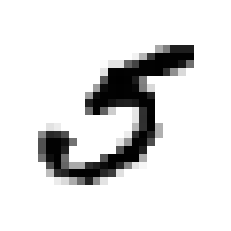

In [8]:
# Plotting an image

plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.axis('off')
plt.show()

In [9]:
# Checking the label of the above plotted number to verify

y[36000]

5

# Explore dataset to gain insights

## Splitting the dataset in training and test set

Note: Actually, the MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images).

In [10]:
X_train, y_train = X[:60000], y[:60000]

X_test, y_test = X[60000:], y[60000:]

In [11]:
# Shuffle the indices of training set

np.random.seed(21)
shuffle_index = np.random.permutation(60000) # Generating random values upto 60,000

X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

## Checking proportion of values in each class

In [12]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

It is evident from above that, the proportion of each of the class is nearly equal to each other. That is, the dataset is symmetric.

Hence, accuracy can be used as a performance measure.

# Prepare the data for feeding to ML algorithm

## Scaling the features

In [37]:
# Scaling the features of training set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train.astype(np.float64))

X_train = scaler.transform(X_train.astype(np.float64))

## Preparing the pipeline

In [38]:
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([('std_scaler', StandardScaler())])

# Explore different classifiers and select best ones

## Classifier-1: Stochastic Gradient Descent (SGD)

In [15]:
# Ignore the Convergence Warnings

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter('ignore', ConvergenceWarning)

# Importing the Classifier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=21, max_iter=10)

# Measuring performance using Cross Validation

from sklearn.model_selection import cross_val_score

# sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')
# sgd_scores

array([0.9106 , 0.91065, 0.91065])

<div class="alert alert-block alert-info">

## Classifier-2: Random Forest

In [16]:
# Importing the Classifier

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=21)

# Measuring performance using Cross Validation

from sklearn.model_selection import cross_val_score

# forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')
# forest_scores

## Classifier-3: K-Nearest Neighbours (KNN)

In [17]:
# Importing the Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Measuring performance using Cross Validation

from sklearn.model_selection import cross_val_score

# knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=2, n_jobs=3, scoring='accuracy')
# knn_scores

array([0.9376, 0.9341])

f1 score for KNN

## Summary of scores

In [18]:
def ScoresMatrix(scores, labels):
    import pandas as pd
    means = []
    stds = []
    for i in scores:
        means.append(i.mean())
        stds.append(i.std())
    return pd.DataFrame([means, stds], columns=labels, index=['Mean (μ)', 'Standard Deviation (σ)'])

In [19]:
ScoresMatrix(scores=[sgd_scores, forest_scores, knn_scores], labels=['SGD', 'Random Forest', 'KNN'])

# OUTPUT:

# SGD	Random Forest	KNN
# Mean (μ)	0.910633	0.965850	0.93585
# Standard Deviation (σ)	0.000024	0.001379	0.00175

,SGD,Random Forest,KNN
Mean (μ),0.910633,0.965850,0.93585
Standard Deviation (σ),0.000024,0.001379,0.00175


**Conclusion:** Based on the above analysis, it can be concluded that Random Forests is performing better than all other models.

# Error Analysis & fine tuning the algorithm

## Plotting Confusion Matrix

In [18]:
# Fitting model and getting predictions

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [19]:
# Computing Confusion Matrix

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5838,    1,   10,    2,    6,    9,   21,    1,   33,    2],
       [   1, 6638,   30,   14,   14,   11,    7,   13,    8,    6],
       [  25,   12, 5757,   25,   30,    4,   22,   41,   36,    6],
       [  10,    5,   81, 5829,    4,   63,    9,   50,   50,   30],
       [   8,   10,   11,    0, 5659,    0,   29,   11,   12,  102],
       [  23,    7,   15,   66,    9, 5196,   44,    5,   32,   24],
       [  29,    9,    4,    0,    8,   43, 5810,    0,   15,    0],
       [   6,   22,   63,    6,   36,    2,    0, 6035,   13,   82],
       [  13,   32,   34,   55,   29,   44,   29,    5, 5548,   62],
       [  25,    9,   18,   72,   70,   22,    3,   53,   36, 5641]])

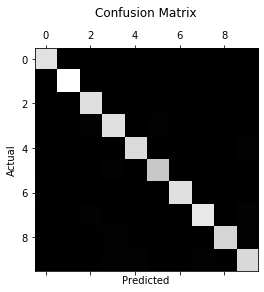

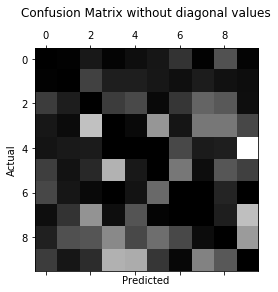

In [33]:
# Plotting Confusion Matrix

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', pad=20)
plt.show()

# Plotting Confusion Matrix ignoring the diagonal to observe other values

## Converting observation values to percentages instead of absolutes
row_sums = conf_mx.sum(axis=1, keepdims=True)
perc_conf_mx = conf_mx / row_sums

## Fill diagonal with zeros
np.fill_diagonal(perc_conf_mx, 0)

plt.matshow(perc_conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix without diagonal values', pad=20)
plt.show()

**Observations:** 

+ <u>First Plot:</u> Here, most of the observations are on the main diagonal of the matrix and it represents correct predictions. The higher the number of observations, more brighter it is in the matrix.
<br><br>
+ <u>Second Plot:</u> The incorrect predictions, visible as brighter spots in (x,y) format, are (2,3), (2,7), (3,5), (5,3). Apart from these points, many values are incorrectly predicted as digit 9 and conversely, digit 9 is incorrectly predicted as different values.

<div class="alert alert-block alert-danger">

## Hyperparameters adjustment - Grid Search / Randomized Search

## Final evaluation on test dataset

In [34]:
final_model = forest_clf

In [40]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [43]:
final_scores = cross_val_score(final_model, X_test, y_test, cv=3, scoring='accuracy')
final_scores

array([0.92021596, 0.94329433, 0.95409541])

In [44]:
final_scores.mean()

0.9392018985941787

<div class="alert alert-block alert-info" style="margin-top: 0px">

Project prepared by:

**Dhyey Kotecha**

Email: dhyeygkotecha@gmail.com

(May 19, 2020)